In [106]:
import os
import numpy as np
import matplotlib.pyplot as plt
import globals as gl
import xarray as xr
import PcmPy as pcm
import pandas as pd
from vis import lineplot_roi_avg

experiment = 'EFC_learningfMRI'

plt.style.use('default')

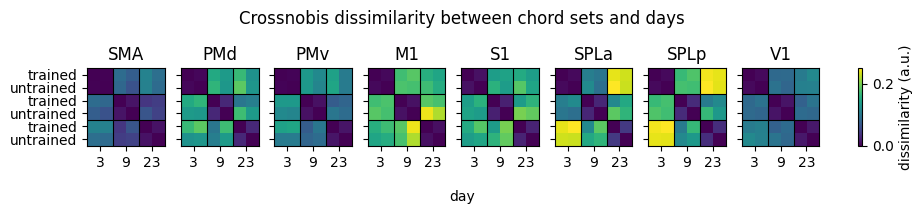

In [107]:
rois = gl.rois['ROI']
days = [3, 9, 23]
H = 'L'
G = xr.load_dataarray(os.path.join(gl.baseDir, experiment, gl.pcmDir, 'G_obs.set.h5'), engine="h5netcdf")
G = G.sel(Hem=H)

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2))

vmin, vmax = 0, .25

for r, roi in enumerate(rois):
    ax = axs[r]
    Gg = G.sel(roi=roi).values
    Dd = pcm.G_to_dist(Gg)
    ax.imshow(Dd.mean(axis=0), vmin=vmin, vmax=vmax)
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels(days)
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(1.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8)
    ax.axvline(1.5, color='k', lw=.8)
    ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Crossnobis dissimilarity between chord sets and days')

plt.show()

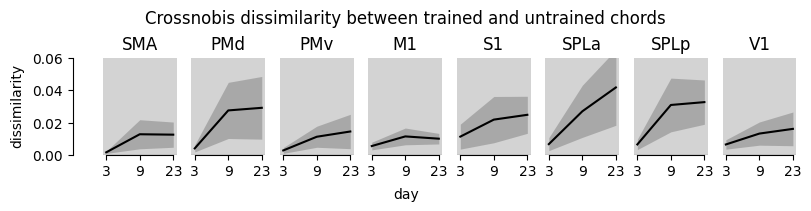

In [108]:
xnob = {'within': [], 'day': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    Gg = G.sel(roi=roi).values
    Dd = pcm.G_to_dist(Gg)
    for I, i in enumerate(np.arange(1, 6, 2)):
        within = Dd[:, i-1, i]
        xnob['within'].extend(within)
        xnob['day'].extend(np.repeat(days[I], within.size))
        xnob['sn'].extend(np.arange(within.size))
        xnob['roi'].extend([roi] * within.size)
        xnob['Hem'].extend([H] * within.size)

df_xnob = pd.DataFrame(xnob)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_xnob, metric='within', H='L', rois=rois, color='k')
axs[0].set_ylim([0, .06])
fig.supxlabel('day', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Crossnobis dissimilarity between trained and untrained chords')

plt.show()

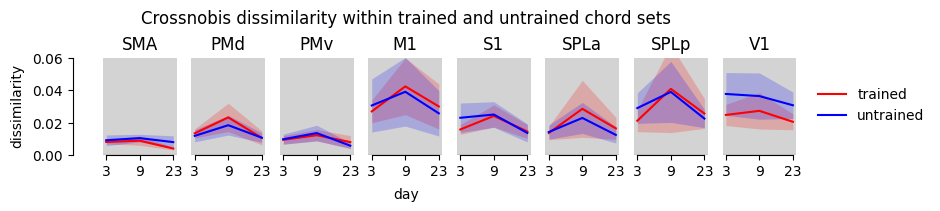

In [110]:
G = xr.load_dataarray(os.path.join(gl.baseDir, experiment, gl.pcmDir, 'G_obs.chord.h5'), engine="h5netcdf")
G = G.sel(Hem=H)
xnob = {'within': [], 'day': [], 'sn': [], 'roi': [], 'Hem': [], 'chord': []}
for r, roi in enumerate(rois):
    Gg = G.sel(roi=roi).values
    Dd = pcm.G_to_dist(Gg)
    for I, i in enumerate(np.arange(0, 24, 8)):
        trained = Dd[:, i:i+4, i:i+4].mean(axis=(1, 2))
        untrained = Dd[:, i+4:i+8, i+4:i+8].mean(axis=(1, 2))
        xnob['within'].extend(trained)
        xnob['within'].extend(untrained)
        xnob['chord'].extend(['trained'] * trained.size + ['untrained'] * trained.size)
        xnob['day'].extend(np.repeat(days[I], trained.size * 2))
        xnob['sn'].extend(np.arange(trained.size * 2))
        xnob['roi'].extend([roi] * (trained.size * 2))
        xnob['Hem'].extend([H] * (trained.size * 2))

df_xnob = pd.DataFrame(xnob)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_xnob, metric='within', H='L', rois=rois, color=['red', 'blue'], label=['trained', 'untrained'], hue='chord')
axs[0].set_ylim([0, .06])
fig.supxlabel('day', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Crossnobis dissimilarity within trained and untrained chord sets')

plt.show()

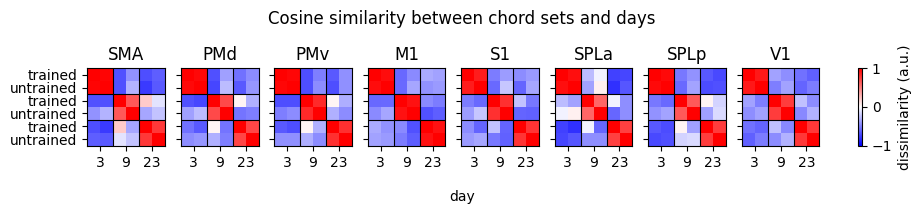

In [4]:
rois = gl.rois['ROI']
H = 'L'
G = xr.load_dataarray(os.path.join(gl.baseDir, experiment, gl.pcmDir, 'G_obs.set.h5'), engine="h5netcdf")
G = G.sel(Hem=H)

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(10, 2))

vmin, vmax = -1, 1

for r, roi in enumerate(rois):
    ax = axs[r]
    Gg = G.sel(roi=roi).mean(axis=0).values
    Dd = pcm.G_to_cosine(Gg)
    ax.imshow(Dd, vmin=vmin, vmax=vmax, cmap='bwr')
    ax.set_title(roi)
    ax.set_xticks([.5, 2.5, 4.5])
    ax.set_xticklabels([3, 9, 23])
    ax.set_yticks(np.arange(6))
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(1.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8)
    ax.axvline(1.5, color='k', lw=.8)
    ax.axvline(3.5, color='k', lw=.8)

fig.supxlabel('day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Cosine similarity between chord sets and days')

plt.show()

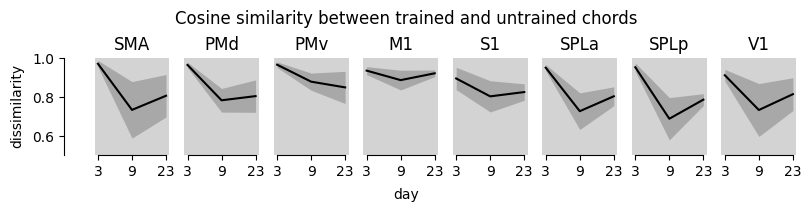

In [85]:
cos = {'within': [], 'between_trained': [], 'between_untrained': [], 'day': [], 'sn': [], 'roi': [], 'Hem': []}
for r, roi in enumerate(rois):
    Gg = G.sel(roi=roi).values
    Dd = pcm.G_to_cosine(Gg)
    for I, i in enumerate(np.arange(1, 6, 2)):
        within = Dd[:, i-1, i]
        between_trained = Dd[:, 0, i-1]
        between_untrained = Dd[:, 0, i]
        cos['within'].extend(within)
        cos['between_trained'].extend(between_trained)
        cos['between_untrained'].extend(between_untrained)
        cos['day'].extend(np.repeat(days[I], within.size))
        cos['sn'].extend(np.arange(within.size))
        cos['roi'].extend([roi] * within.size)
        cos['Hem'].extend([H] * within.size)

df_cos = pd.DataFrame(cos)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_cos.copy(), metric='within', H='L', rois=rois, color='k')
axs[0].set_ylim([.5, 1])
fig.supxlabel('day', fontsize=10)
fig.supylabel('dissimilarity', fontsize=10)
fig.suptitle('Cosine similarity between trained and untrained chords')

plt.show()

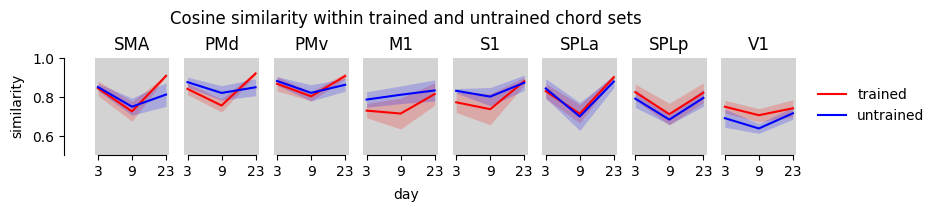

In [115]:
G = xr.load_dataarray(os.path.join(gl.baseDir, experiment, gl.pcmDir, 'G_obs.chord.h5'), engine="h5netcdf")
G = G.sel(Hem=H)
cos = {'within': [], 'day': [], 'sn': [], 'roi': [], 'Hem': [], 'chord': []}
for r, roi in enumerate(rois):
    Gg = G.sel(roi=roi).values
    Dd = pcm.G_to_cosine(Gg)
    for I, i in enumerate(np.arange(0, 24, 8)):
        trained = Dd[:, i:i+4, i:i+4].mean(axis=(1, 2))
        untrained = Dd[:, i+4:i+8, i+4:i+8].mean(axis=(1, 2))
        cos['within'].extend(trained)
        cos['within'].extend(untrained)
        cos['chord'].extend(['trained'] * trained.size + ['untrained'] * trained.size)
        cos['day'].extend(np.repeat(days[I], trained.size * 2))
        cos['sn'].extend(np.arange(trained.size * 2))
        cos['roi'].extend([roi] * (trained.size * 2))
        cos['Hem'].extend([H] * (trained.size * 2))

df_cos = pd.DataFrame(cos)
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_cos.copy(), metric='within', H='L', rois=rois, color=['red', 'blue'], label=['trained', 'untrained'], hue='chord')
axs[0].set_ylim([.5, 1])
fig.supxlabel('day', fontsize=10)
fig.supylabel('similarity', fontsize=10)
fig.suptitle('Cosine similarity within trained and untrained chord sets')

plt.show()

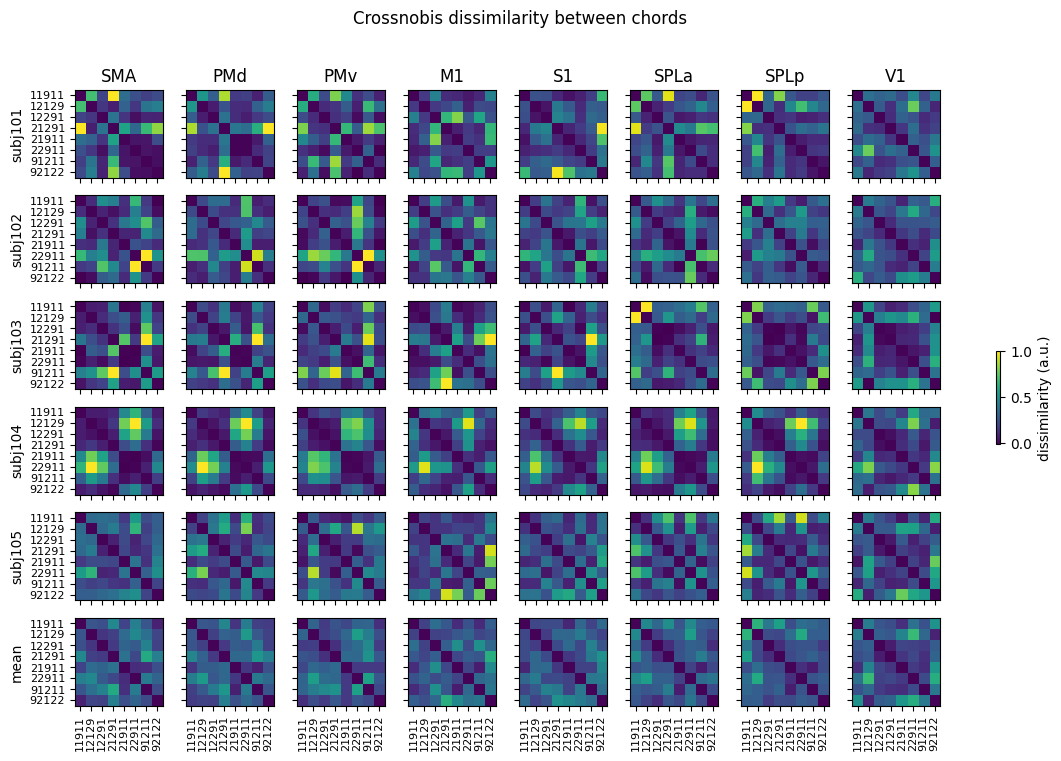

In [60]:
rois = gl.rois['ROI']
H = 'L'
G = xr.load_dataarray(os.path.join(gl.baseDir, experiment, gl.pcmDir, 'G_obs.chord_pattern.h5'), engine="h5netcdf")
G = G.sel(Hem=H)
N = G.shape[0]

fig, axs = plt.subplots(N + 1, len(rois), sharex=True, sharey=True, figsize=(12, 8))

vmin, vmax = -1, 1
for r, roi in enumerate(rois):
    Dd = np.zeros((N, 8, 8))
    for i in range(N):
        ax = axs[i, r]
        Gg = G.sel(roi=roi, subj=i + 101).values
        Dd[i] = pcm.G_to_dist(Gg / np.trace(Gg))
        ax.imshow(Dd[i], vmin=-.01, vmax=1)
        ax.set_yticks(np.arange(8))
        ax.set_yticklabels(gl.chordID, fontsize=8)
        ax.set_ylabel(f'subj{i + 101}') if r==0 else None
    axs[-1, r].imshow(Dd.mean(axis=0), vmin=-.01, vmax=1)
    axs[-1, r].set_xticks(np.arange(8))
    axs[-1, r].set_xticklabels(gl.chordID, rotation=90, fontsize=8)
    axs[-1, r].set_yticks(np.arange(8))
    axs[-1, r].set_yticklabels(gl.chordID, fontsize=8)
    axs[-1, r].set_ylabel(f'mean') if r==0 else None
    axs[0, r].set_title(roi)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Crossnobis dissimilarity between chords')
fig.subplots_adjust(right=.85)

plt.show()